In [29]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [30]:
df_TW = df[df['job_country'] == 'Taiwan'].copy()

In [31]:
df_TW['job_posted_month'] = df_TW['job_posted_date'].dt.strftime('%B')

In [32]:
df_TW_pivot = df_TW.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')


In [33]:
df_TW_pivot.reset_index(inplace=True)
df_TW_pivot['month_no'] = pd.to_datetime(df_TW_pivot['job_posted_month'], format='%B').dt.month

In [34]:
df_TW_pivot.sort_values(by='month_no', inplace=True)
df_TW_pivot.set_index('job_posted_month', inplace=True)
df_TW_pivot.drop(columns='month_no', inplace=True)
df_TW_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,13.0,7.0,45.0,68.0,41.0,4.0,7.0,8.0,5.0,34.0
February,7.0,NaN,22.0,31.0,25.0,7.0,2.0,4.0,3.0,18.0
March,11.0,3.0,26.0,36.0,12.0,5.0,2.0,5.0,1.0,25.0
April,12.0,6.0,15.0,23.0,19.0,13.0,6.0,5.0,2.0,15.0
May,12.0,NaN,23.0,17.0,19.0,8.0,5.0,7.0,2.0,7.0
June,7.0,3.0,33.0,39.0,23.0,12.0,1.0,8.0,5.0,16.0
July,18.0,4.0,15.0,26.0,16.0,3.0,6.0,5.0,1.0,18.0
August,13.0,4.0,28.0,26.0,18.0,1.0,3.0,4.0,3.0,15.0
September,16.0,5.0,18.0,21.0,16.0,3.0,4.0,7.0,4.0,13.0


<Axes: xlabel='job_posted_month'>

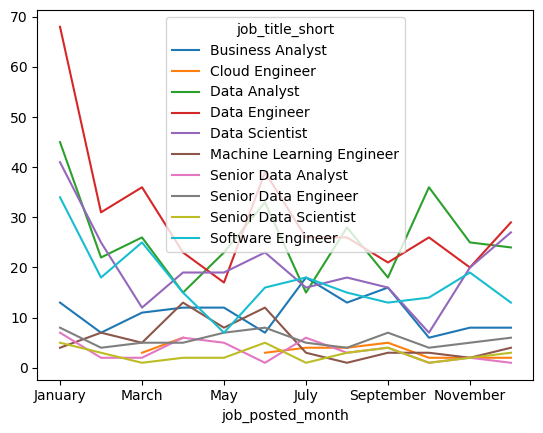

In [36]:
df_TW_pivot.plot(kind='line')

In [45]:
top_3 = df_TW['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

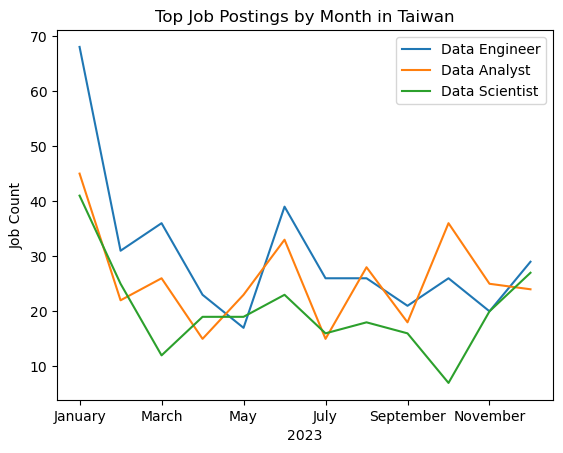

In [51]:
df_TW_pivot[top_3].plot(kind='line')
plt.title('Top Job Postings by Month in Taiwan')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()

